In [107]:
from __future__ import absolute_import,division,print_function,unicode_literals

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

import pandas as pd

from download import download

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False


![alt text](https://devopedia.org/images/article/107/7999.1532720149.jpg)

In [108]:
! ls

sample_data


In [109]:
df1 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv')
df1.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [110]:
df1.columns

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')

In [111]:
from datetime import datetime

def parse(x):
  return datetime.strptime(x, '%m %d %Y %H')

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv',  parse_dates =[['month', 'day', 'year','hour']], 
                        date_parser=parse,keep_date_col=True)
df.head()

,month_day_year_hour,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010-01-01 00:00:00,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2010-01-01 01:00:00,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,2010-01-01 02:00:00,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,2010-01-01 03:00:00,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,2010-01-01 04:00:00,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [112]:
df.head()

,month_day_year_hour,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010-01-01 00:00:00,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2010-01-01 01:00:00,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,2010-01-01 02:00:00,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,2010-01-01 03:00:00,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,2010-01-01 04:00:00,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [113]:
df_non_indexed= df.copy()

In [114]:
print("Rows     :", df.shape[0])
print("Columns  :", df.shape[1])
print("\n Features \n", df.columns.to_list())
print("\n Missing Values \n", df.isnull().any())
print("\n Unique Values \n", df.nunique())

Rows     : 43824
Columns  : 14

 Features 
 ['month_day_year_hour', 'No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir']

 Missing Values 
 month_day_year_hour    False
No                     False
year                   False
month                  False
day                    False
hour                   False
pm2.5                   True
DEWP                   False
TEMP                   False
PRES                   False
cbwd                   False
Iws                    False
Is                     False
Ir                     False
dtype: bool

 Unique Values 
 month_day_year_hour    43824
No                     43824
year                       5
month                     12
day                       31
hour                      24
pm2.5                    581
DEWP                      69
TEMP                      64
PRES                      60
cbwd                       4
Iws                     2788
Is                        28
Ir

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   month_day_year_hour  43824 non-null  datetime64[ns]
 1   No                   43824 non-null  int64         
 2   year                 43824 non-null  object        
 3   month                43824 non-null  object        
 4   day                  43824 non-null  object        
 5   hour                 43824 non-null  object        
 6   pm2.5                41757 non-null  float64       
 7   DEWP                 43824 non-null  int64         
 8   TEMP                 43824 non-null  float64       
 9   PRES                 43824 non-null  float64       
 10  cbwd                 43824 non-null  object        
 11  Iws                  43824 non-null  float64       
 12  Is                   43824 non-null  int64         
 13  Ir                   43824 non-

In [116]:
df['month']= pd.to_numeric(df['month'])

In [117]:
df.describe()

,No,month,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,6.523549,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,3.448572,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,1.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,4.000000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,7.000000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,10.000000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,12.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [118]:
df= df.set_index('month_day_year_hour')

In [119]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
month_day_year_hour,,,,,,,,,,,,,
2010-01-01 00:00:00,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [120]:
df.loc['2013':'2015']

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
month_day_year_hour,,,,,,,,,,,,,
2013-01-01 00:00:00,26305,2013,1,1,0,35.0,-10,-5.0,1018.0,NW,5.81,0,0
2013-01-01 01:00:00,26306,2013,1,1,1,31.0,-11,-7.0,1017.0,NW,9.83,0,0
2013-01-01 02:00:00,26307,2013,1,1,2,32.0,-11,-7.0,1017.0,NW,11.62,0,0
2013-01-01 03:00:00,26308,2013,1,1,3,21.0,-14,-10.0,1018.0,NW,14.75,0,0
2013-01-01 04:00:00,26309,2013,1,1,4,16.0,-15,-10.0,1018.0,cv,0.45,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0


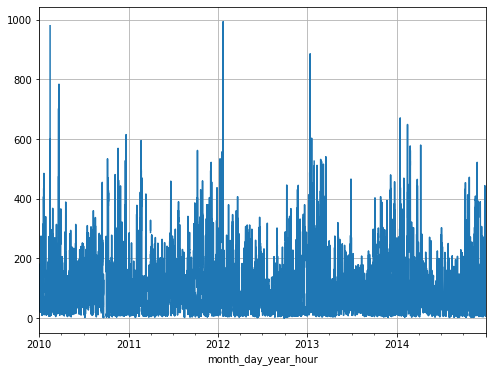

In [121]:
df['pm2.5'].plot(grid=True)

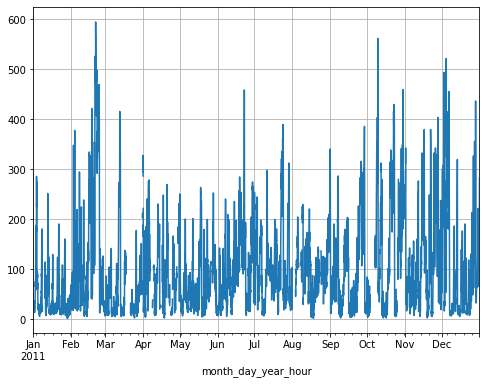

In [122]:
df.loc['2011']['pm2.5'].plot(grid= True)

In [123]:
import plotly.express  as px
fig  = px.line(df_non_indexed, x='month_day_year_hour', y = 'pm2.5')
fig.update_xaxes(rangeslider_visible= True)
fig.show()

In [126]:
df.loc['2012':'2014'][['month','pm2.5']].groupby('month').describe()

pm2.5                                                         
        count        mean         std  min    25%   50%     75%    max
month                                                                 
1      2146.0  144.521901  143.829460  6.0  35.00  95.0  198.00  994.0
2      2030.0  127.018719  122.324801  3.0  21.00  92.0  185.75  649.0
3      2222.0  110.130513   97.238776  3.0  24.00  88.0  163.75  541.0
4      2151.0   82.974895   63.178936  4.0  34.00  69.0  119.00  580.0
5      2160.0   82.673148   53.009552  5.0  43.00  74.0  110.00  320.0
6      2129.0   89.207140   64.905613  1.0  39.00  73.0  131.00  466.0
7      2162.0   79.706290   56.422460  6.0  34.00  67.0  112.00  318.0
8      2091.0   67.918699   48.847111  2.0  29.00  58.0   94.00  302.0
9      2146.0   73.703169   57.047708  0.0  26.00  62.0  109.00  298.0
10     2221.0  113.990545  104.315799  2.0  29.00  80.0  177.00  472.0
11     2122.0   94.333648   96.621436  2.0  17.25  55.5  147.75  522.0
12     2054.0   94.781402  100.471681  4.0  17.00  52.0  141.00  480.0

In [130]:
df.loc['2013':'2015'][['month','pm2.5','TEMP']].groupby('month').agg({'pm2.5':['max'],'TEMP':['min','max']})

pm2.5  TEMP      
         max   min   max
month                   
1      886.0 -17.0  11.0
2      649.0 -15.0  16.0
3      541.0  -7.0  26.0
4      580.0  -1.0  30.0
5      320.0   6.0  42.0
6      466.0  14.0  38.0
7      303.0  19.0  38.0
8      209.0  14.0  37.0
9      298.0   7.0  34.0
10     472.0   1.0  25.0
11     522.0  -5.0  20.0
12     480.0 -11.0  15.0

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb7a56c9b0>,
      dtype=object)

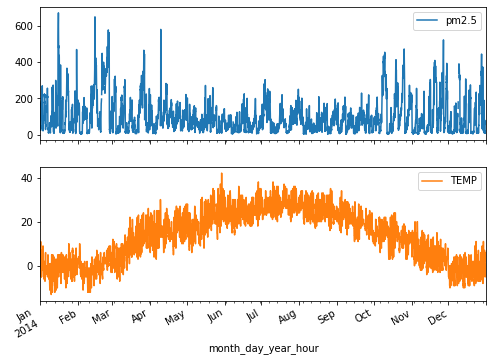

In [134]:
df.loc['2014'][['pm2.5','TEMP']].plot(subplots= True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb7aee6a58>,
      dtype=object)

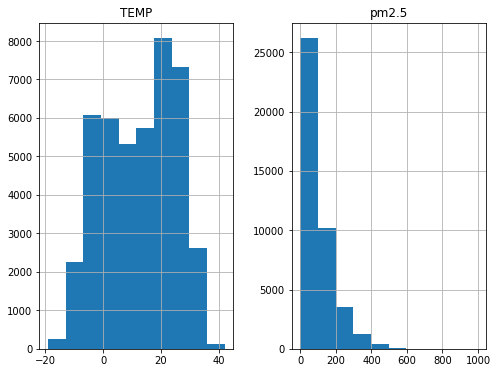

In [135]:
df[['pm2.5','TEMP']].hist()

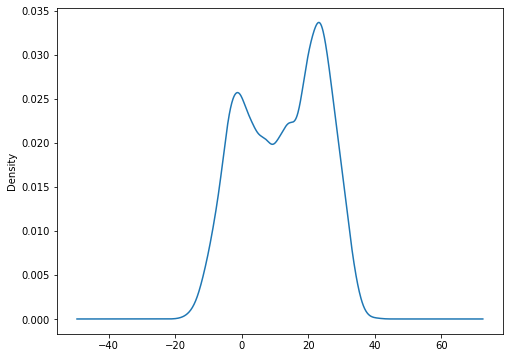

In [136]:
df['TEMP'].plot(kind= 'density')

**SingleVariate Analysis(autocorelation)**

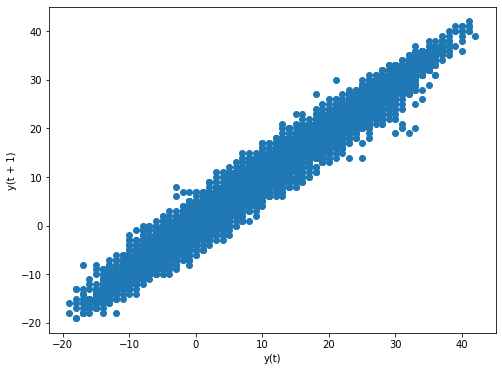

In [139]:
pd.plotting.lag_plot(df['TEMP'],lag=1)# autocorrealtion with lag of 1 hour

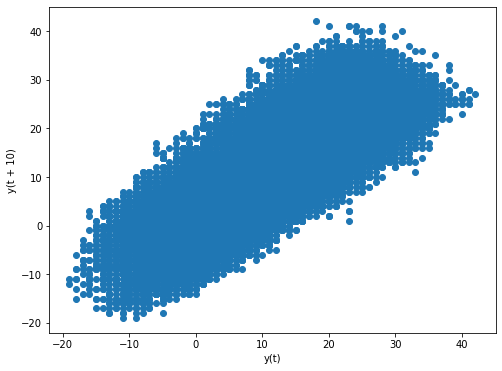

In [140]:
pd.plotting.lag_plot(df['TEMP'],lag=10)

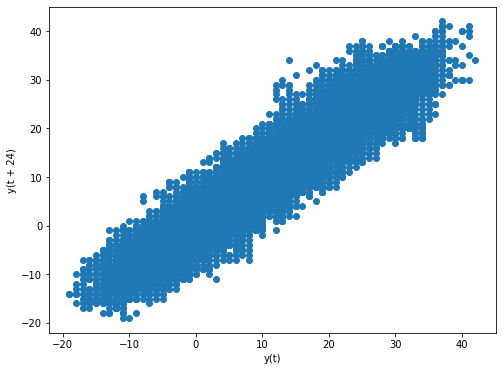

In [141]:
pd.plotting.lag_plot(df['TEMP'],lag=24)

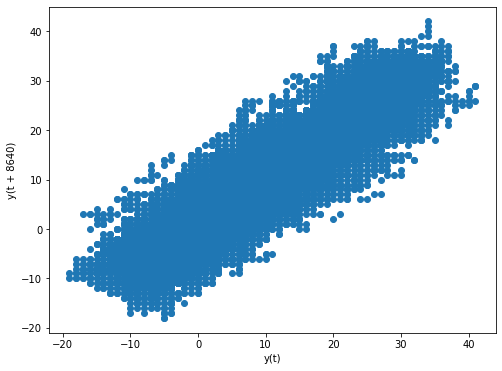

In [142]:
pd.plotting.lag_plot(df['TEMP'],lag=8640)#yearly correlation

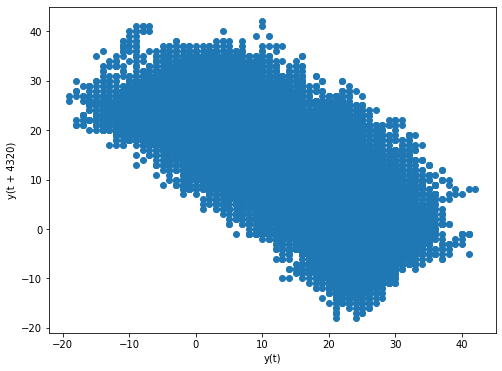

In [143]:
pd.plotting.lag_plot(df['TEMP'],lag=4320)# 6 month

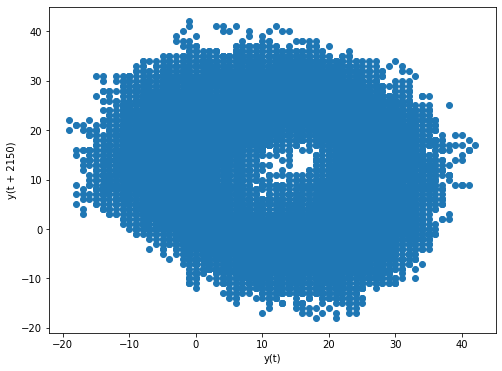

In [144]:
pd.plotting.lag_plot(df['TEMP'],lag=2150)# 3 months

**Multivariate Analysis**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb79d3a198>,
      dtype=object)

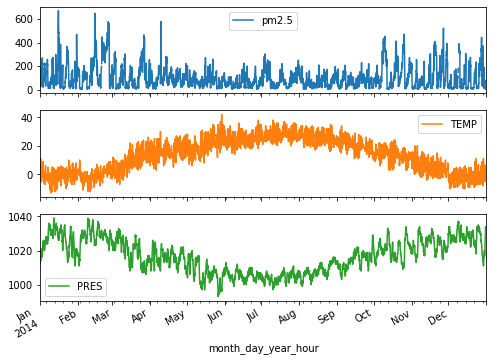

In [150]:
df.loc['2014'][['pm2.5','TEMP','PRES']].plot(subplots= True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb77091c50>,
      dtype=object)

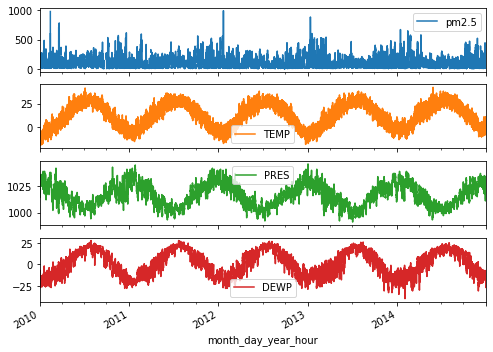

In [151]:
df[['pm2.5','TEMP','PRES','DEWP']].plot(subplots= True)

In [152]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')

In [153]:
df.isnull().values.any()

True

In [154]:
df.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [156]:
df[['pm2.5','DEWP','TEMP','PRES']].corr(method='pearson')

,pm2.5,DEWP,TEMP,PRES
pm2.5,1.000000,0.171423,-0.090534,-0.047282
DEWP,0.171423,1.000000,0.824633,-0.778346
TEMP,-0.090534,0.824633,1.000000,-0.826690
PRES,-0.047282,-0.778346,-0.826690,1.000000


In [157]:
df_na = df.copy()
df_na= df_na.dropna()

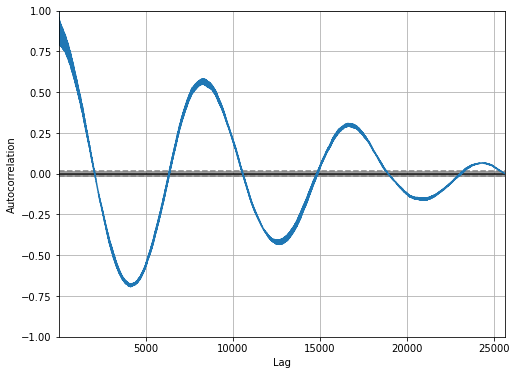

In [158]:
# autocorrealtion between lagged values 
# x axis has hour (we have hourly data)
pd.plotting.autocorrelation_plot(df_na.loc['2012':'2015']['TEMP'])

In [162]:
df_na['TEMP'].resample('1m').mean()
# resample data fro 1 month amnd mean agg.

month_day_year_hour
2010-01-31    -6.364472
2010-02-28    -1.918033
2010-03-31     2.983075
2010-04-30    10.805014
2010-05-31    20.856174
2010-06-30    24.458407
2010-07-31    27.729839
2010-08-31    25.337278
2010-09-30    22.224359
2010-10-31    12.280323
2010-11-30     3.289157
2010-12-31    -2.064516
2011-01-31    -5.543155
2011-02-28    -0.854167
2011-03-31     6.993600
2011-04-30    14.684701
2011-05-31    20.730337
2011-06-30    25.630098
2011-07-31    26.464238
2011-08-31    25.657895
2011-09-30    19.223922
2011-10-31    13.214286
2011-11-30     5.946853
2011-12-31    -2.308210
2012-01-31    -4.943284
2012-02-29    -2.584058
2012-03-31     5.066216
2012-04-30    15.463143
2012-05-31    21.930535
2012-06-30    24.334746
2012-07-31    26.568314
2012-08-31    25.542536
2012-09-30    20.119048
2012-10-31    13.306757
2012-11-30     3.687679
2012-12-31    -4.366450
2013-01-31    -5.381597
2013-02-28    -1.825633
2013-03-31     5.397835
2013-04-30    12.232168
2013-05-31    21.482

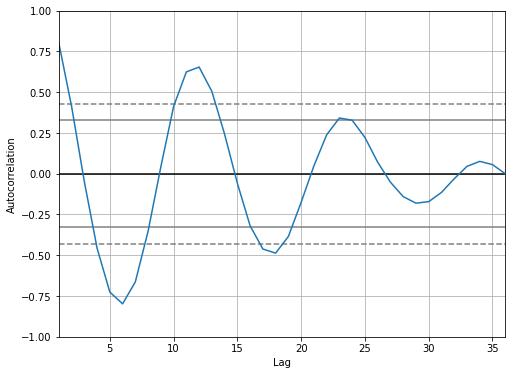

In [163]:
pd.plotting.autocorrelation_plot(df_na.loc['2012':'2015']['TEMP'].resample('1m').mean())
# dotted line , 95% confidence interval
# dark line, 90% confidence interval

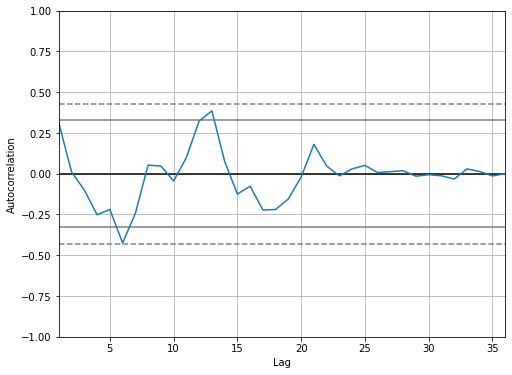

In [164]:
pd.plotting.autocorrelation_plot(df_na.loc['2012':'2015']['pm2.5'].resample('1m').mean())
# no/less autocorrelaltion, all values lies under 90% confidence interval

**Stationarity:**

1. The mean of the series should not be a function of time rather should be a constant. 
![alt text](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Mean_nonstationary.png)

2. The variance of the series should not a be a function of time.

![alt text](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Var_nonstationary.png)

3. The covariance of the i th term and the (i + m) th term should not be a function of time.

![alt text](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Cov_nonstationary.png)

*  Trend → a general systematic linear or (most often) nonlinear component that changes over time and does not repeat

*  Seasonality → a general systematic linear or (most often) nonlinear component that changes over time and does repeat.

*  Noise → a non-systematic component that is nor Trend/Seasonality within the data.

*  Level: The average value in the series.

**1. Additive Model**

An additive model suggests that the components are added together as follows:


**y(t) = Level + Trend + Seasonality + Noise**

An additive model is linear where changes over time are consistently made by the same amount.

A linear trend is a straight line.

A linear seasonality has the same frequency (width of cycles) and amplitude (height of cycles).

**2. Multiplicative Model**

A multiplicative model suggests that the components are multiplied together as follows:


**y(t) = Level * Trend * Seasonality * Noise**

A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time.

A nonlinear trend is a curved line.

A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time.

![alt text](https://docs.oracle.com/cd/E40248_01/epm.1112/cb_pred_user/images/graphics/seasonaltypes.gif)